In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
%matplotlib inline
from matplotlib.ticker import FuncFormatter 
import matplotlib
import matplotlib.pyplot as plt
import glob
from pdb import set_trace
import json

def ts_plotter(self, ax, data1, data2):
    '''
    Helper for plotting panels in time series plot.
    '''

    out = ax.plot(data1, data2, linewidth=2)
    return out   

In [2]:
# ********************
# GAME 3: SHUFFLE KEYS
# ********************

## --- Read in data

# Random policy
df_r = pd.DataFrame() 
files = glob.glob("../data/shuffleKeys_game/random/*") #random files
for file in files:
     with open (file, 'r') as fp: 
            data = json.load(fp)
            #set_trace()
            df_r[file.split('/')[4].split('.')[0]] = data['data']['steps'][1:]

# Human
df_hum = pd.DataFrame() 
files = glob.glob("../data/shuffleKeys_game/human/*") #random files
for file in files:
     with open (file, 'r') as fp: 
            data = json.load(fp)
            #set_trace()
            df_hum[file.split('/')[4].split('.')[0]] = data['data']['steps'][1:]               
            
# DQN with lr = 0.0025 and gamma = 0.999 
df_dqn_lr00025_y999 = pd.DataFrame() 
files = glob.glob("../data/shuffleKeys_game/dqn_training/*") #random files
for file in files:
     with open (file, 'r') as fp: 
            data = json.load(fp)
            #set_trace()
            df_dqn_lr00025_y999[file.split('/')[4].split('.')[0]] = data['data']['steps'][1:] 

In [3]:
# ********************
# GAME 3: SHUFFLE KEYS
# ********************

## --- Get descriptive statistics

stats = pd.DataFrame() #for stats

# Random policy
stats['r_m'] = df_r.mean(axis=1)
stats['r_se'] = df_r.sem(axis=1)

## DQN with lr = 0.0025 and gamma = 0.999 
stats['dqn_lr00025_y999_m'] = df_dqn_lr00025_y999.mean(axis=1)
stats['dqn_lr00025_y999_se'] = df_dqn_lr00025_y999.sem(axis=1)

# # Self class
# stats['sc_m'] = df_sc.mean(axis=1)
# stats['sc_se'] = df_sc.sem(axis=1)

# Humans
stats['hum_m'] = df_hum.mean(axis=1)
stats['hum_se'] = df_hum.sem(axis=1)

stats['x'] = stats.index

In [ ]:
# Run this cell if you want to bin the data
stats = stats.groupby(stats.index // 5).mean().reset_index()

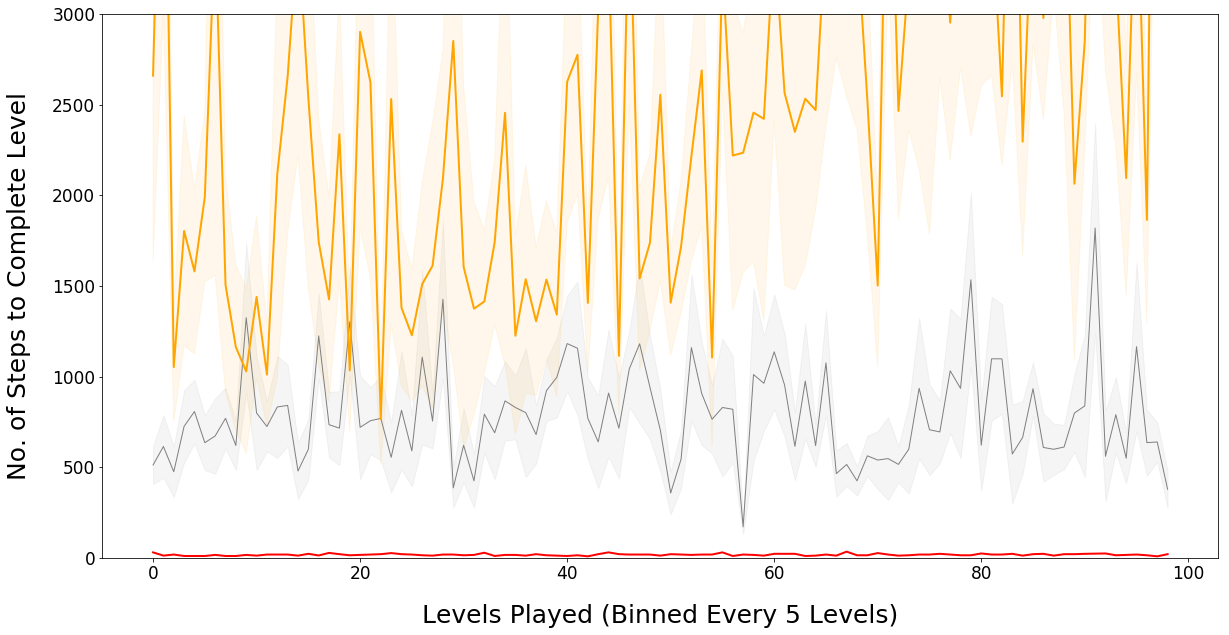

In [4]:
# ********************
# GAME 3: SHUFFLE KEYS
# ********************

## --- Plot descriptive statistics

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 3000]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played (Binned Every 5 Levels)", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

# Random policy
r_l = ax.plot(stats.r_m, color='gray', linewidth=1, label='Random')
ax.fill_between(stats.x, stats.r_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.08, color='gray')

# DQN with lr = 0.0025 and gamma = 0.999
dqn_l = ax.plot(stats.dqn_lr00025_y999_m, color='orange', linewidth=2, label='DQN')
ax.fill_between(stats.x, stats.dqn_lr00025_y999_m - stats.dqn_lr00025_y999_se, stats.dqn_lr00025_y999_m + stats.dqn_lr00025_y999_se, alpha=0.08, color='orange')

# # Self class
# sc_l = ax.plot(stats.sc_m, color='blue', linewidth=2, label='Self Class')
# ax.fill_between(stats.x, stats.sc_m - stats.sc_se, stats.sc_m + stats.sc_se, alpha=0.08, color='blue')

# Humans
hum_l = ax.plot(stats.hum_m, color='red', linewidth=2, label='Humans')
ax.fill_between(stats.x, stats.hum_m - stats.hum_se, stats.hum_m + stats.hum_se, alpha=0.08, color='red')

#first_legend = plt.legend(handles=[r_l[0], dqn_l[0], sc_l[0], hum_l[0]], loc='upper right', prop={'size': 22})

fig.savefig('effiency_curves.pdf', format='pdf')